In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
concepts_relations = pd.read_csv('../data/concepts_relations.csv')
works_count = pd.read_csv('../data/works_count.csv', index_col='id')

In [3]:
len(concepts_relations)

152

In [4]:
# color coding: range from 0 to 1 with -1 for level 1 concepts
def get_color_code(concept_id):
    try:
        code = works_count.loc[concept_id,'0'] / works_count['0'].max()
    except KeyError:
        code = -1
    return code

# size coding
def get_size(concept_id):
    try:
        size = works_count.loc[concept_id,'0'] / works_count['0'].max()
    except KeyError:
        size = 1
    return size*500

In [5]:
# for labels
concepts_hierarchy = pd.read_csv('../openalex_concepts_hierarchy.csv')
concepts_hierarchy_1  = concepts_hierarchy.copy()[concepts_hierarchy.level==1]

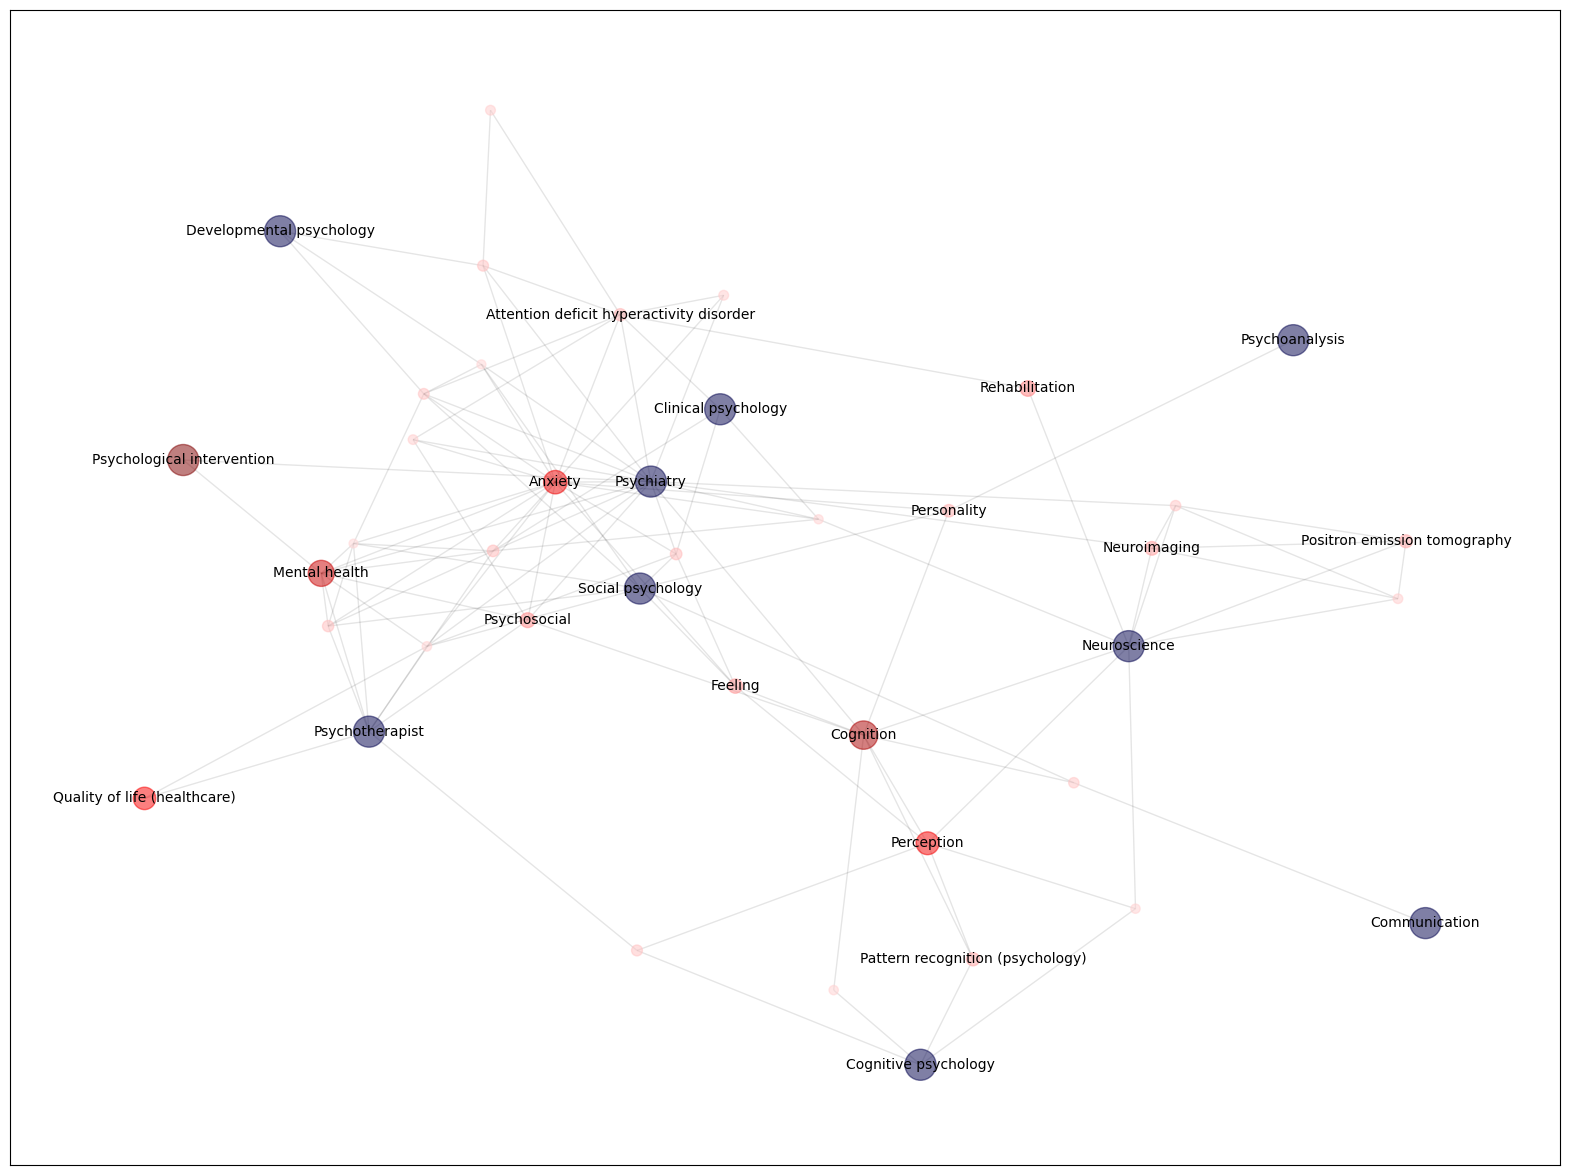

In [8]:
G = nx.Graph()

# labels: only the topN and level 1 concepts get labels
# the others get numbers and a legend
topN = 25
labels = {}
label_count = 0
for index, row in concepts_relations.iterrows():
    G.add_edge(row['id'], row['rel_id'])
    for concept_id in [row['id'], row['rel_id']]:
        if concept_id not in labels:
            if (concept_id in works_count[:topN].index) | (concept_id in concepts_hierarchy_1['openalex_id'].values):
                labels[concept_id] = \
                    concepts_hierarchy[concepts_hierarchy.openalex_id==concept_id]['display_name'].iloc[0]
            else:
                labels[concept_id] = ''#label_count
                label_count += 1

fig = plt.figure(figsize=(20, 15))
ax = plt.axes()

pos = nx.spring_layout(G, seed=97615) # 97615

nx.draw_networkx_nodes(G, pos, ax=ax,
                       node_color=[get_color_code(n) for n in pos], cmap='seismic', alpha=0.5,
                       node_size=[get_size(n) for n in pos])
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.1)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, labels=labels)

#plt.legend()
#plt.tight_layout()
plt.savefig("../concepts_network.png", format="PNG")
plt.show()